# Salary Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 


import json

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [6]:
df.sample(10)   #Random Sample of 10 rows 

,YearsExperience,Salary
2,1.5,37731
22,7.9,101302
24,8.7,109431
25,9.0,105582
18,5.9,81363
27,9.6,112635
4,2.2,39891
11,4.0,55794
21,7.1,98273
19,6.0,93940


In [7]:
df.shape        # Rows and Columns of the Dataset. 

(30, 2)

In [8]:
#Data type of the Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [9]:
# pd.set_option('precision', 2)


df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


- There are no more data we have, I think it is a sample of a big dataset and now we didn't need to scaling the data. 

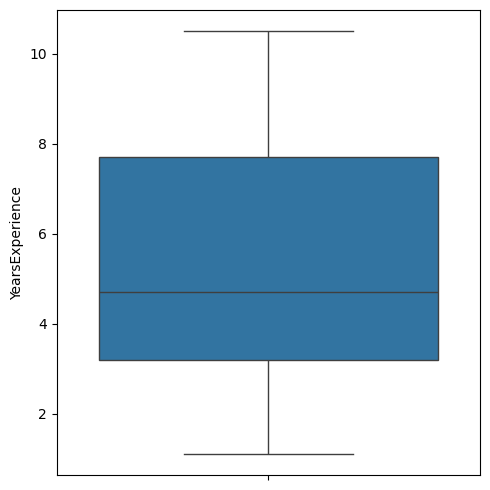

In [11]:
# Outlier Analysis

fig, axs = plt.subplots(1, figsize = (5,5))
plt1 = sns.boxplot(df['YearsExperience'])
plt.tight_layout()

- We can see there is no more outlier in the column

In [12]:
# Checking the Null Values in the Data. 

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
# Checking zero values in the data. 

(df == 0).sum()   

YearsExperience    0
Salary             0
dtype: int64

In [14]:
df.Salary.value_counts()

Salary
39343     1
46205     1
122391    1
112635    1
116969    1
105582    1
109431    1
113812    1
101302    1
98273     1
91738     1
93940     1
81363     1
83088     1
66029     1
67938     1
61111     1
57081     1
56957     1
55794     1
63218     1
57189     1
64445     1
54445     1
60150     1
56642     1
39891     1
43525     1
37731     1
121872    1
Name: count, dtype: int64

In [15]:
df["Salary"].value_counts()

Salary
39343     1
46205     1
122391    1
112635    1
116969    1
105582    1
109431    1
113812    1
101302    1
98273     1
91738     1
93940     1
81363     1
83088     1
66029     1
67938     1
61111     1
57081     1
56957     1
55794     1
63218     1
57189     1
64445     1
54445     1
60150     1
56642     1
39891     1
43525     1
37731     1
121872    1
Name: count, dtype: int64

In [16]:
df.Salary.value_counts().sum()     #Total Unique Values in the Data. 

30

## Analysis of Co-Relation using Visualization 

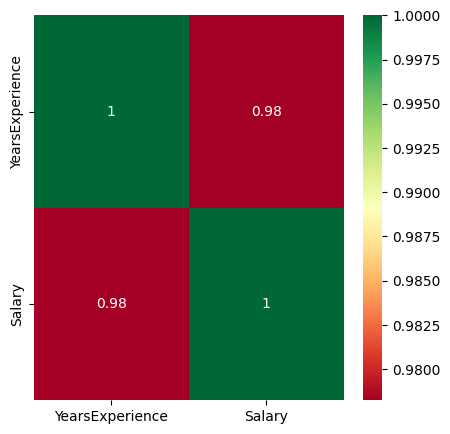

In [17]:
corrmat = df.corr()                        #pariwise correlation of all the columns 
top_corr_features = corrmat.index                    
plt.figure(figsize = (5,5))

#heatmap of the data

g = sns.heatmap(df[corrmat.index].corr(),annot = True, cmap="RdYlGn") # annot present values in the blocks. cmap = colormap 

# g = sns.heatmap(df[top_corr_features].corr(),annot = True, cmap="RdYlGn") 

In [18]:
# pd.set_option('precision', 2)         # 2 values after precision. 

df.corr()   #Correlation between Variables.

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


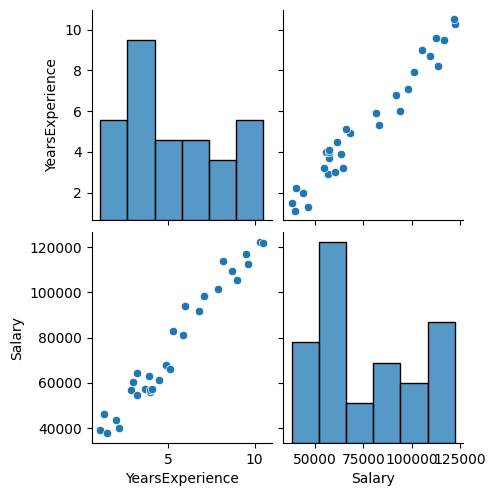

In [19]:
import seaborn as sns
sns.pairplot(df)

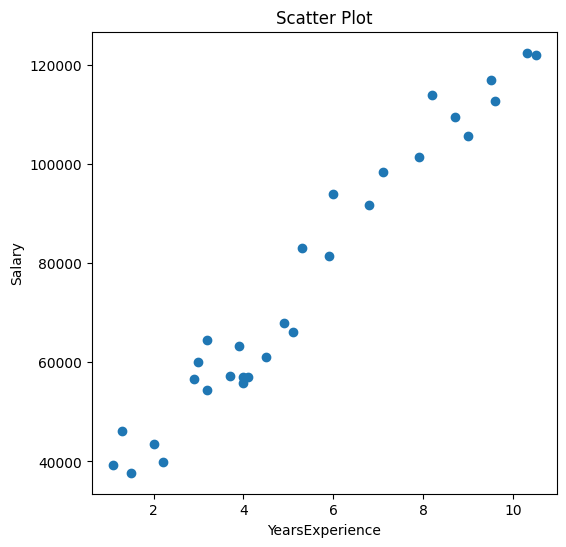

2

In [20]:

X = df['YearsExperience']
y = df['Salary']  

plt.figure(figsize=(6,6))

plt.scatter(X, y, label = "label_name" )

# Set x and y axes labels
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.title('Scatter Plot')

plt.show()
2


In [ ]:
sns.regplot(x=df['YearsExperience'], y=df['Salary'], order=1, ci=None, scatter_kws={'color':'r', 's':9})

plt.xlim(2, 10)
plt.ylim(bottom=30000)

plt.show()


# Linear Regression using Classical Methods

In [21]:
df1 = pd.DataFrame({'YearsExperience as X': df['YearsExperience'], 'Salary as Y ':df['Salary'] })   
df1.head(10)

,YearsExperience as X,Salary as Y
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [22]:
# Calculating the mean of X and Y 

mean_x = df['YearsExperience'].sum() / df['YearsExperience'].count()  
round(mean_x,2) 

mean_y = df['Salary'].sum() / df['Salary'].count()   
round(mean_y,2) 

print(round(mean_x,2) , round(mean_y,2))

5.31 76003.0


In [23]:
X = df['YearsExperience'].values          
Y = df['Salary'].values 
n = len(X)


# Using the formula to calculate m and c

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)

In [24]:
len(Y)

30

In [25]:
m

9449.962321455077

In [26]:
c

25792.20019866869

Y = m * x + c 

In [27]:
Y = m * 1.3 + c  

In [28]:
Y

38077.15121656029

## Linear Regression using Methods

In [29]:
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression

regr = skl_lm.LinearRegression()
X = df.YearsExperience.values.reshape(-1,1)
y = df.Salary

regr.fit(X,y)

LinearRegression()

In [30]:
regr.intercept_

25792.20019866871

In [31]:
regr.coef_

array([9449.96232146])

In [32]:
regr.score(X, y)

0.9569566641435086

In [33]:
( regr.score(X,y) ) * 100           # Accuracy Score of the Model.  

95.69566641435085

# We can see that Our values from the Classical Method and Sklearn Model are same. 

In [35]:
# Now We can Make Prediction. 

regr.predict([[1.3]])

array([38077.15121656])

In [37]:
regr.predict([[12.15]])

array([140609.24240435])

In [38]:
list1 = []

for x in df['YearsExperience']:
    print(regr.predict([[x]]))   
    list1.append(regr.predict([[x]]))
    

[36187.15875227]
[38077.15121656]
[39967.14368085]
[44692.12484158]
[46582.11730587]
[53197.09093089]
[54142.08716303]
[56032.07962732]
[56032.07962732]
[60757.06078805]
[62647.05325234]
[63592.04948449]
[63592.04948449]
[64537.04571663]
[68317.03064522]
[72097.0155738]
[73987.00803809]
[75877.00050238]
[81546.97789525]
[82491.9741274]
[90051.94398456]
[92886.932681]
[100446.90253816]
[103281.8912346]
[108006.87239533]
[110841.86109176]
[115566.84225249]
[116511.83848464]
[123126.81210966]
[125016.80457395]


In [39]:
from itertools import chain
flatten_list = list(chain.from_iterable(list1))
str(flatten_list)

'[36187.15875226929, 38077.151216560305, 39967.143680851324, 44692.12484157886, 46582.11730586988, 53197.09093088842, 54142.08716303393, 56032.07962732494, 56032.07962732494, 60757.060788052484, 62647.053252343496, 63592.049484489005, 63592.049484489005, 64537.04571663451, 68317.03064521654, 72097.01557379858, 73987.00803808958, 75877.0005023806, 81546.97789525366, 82491.97412739915, 90051.9439845632, 92886.93268099973, 100446.90253816379, 103281.8912346003, 108006.87239532784, 110841.86109176437, 115566.84225249192, 116511.83848463741, 123126.81210965598, 125016.80457394698]'

In [40]:
results = list(map(float, flatten_list))
results

[36187.15875226929,
 38077.151216560305,
 39967.143680851324,
 44692.12484157886,
 46582.11730586988,
 53197.09093088842,
 54142.08716303393,
 56032.07962732494,
 56032.07962732494,
 60757.060788052484,
 62647.053252343496,
 63592.049484489005,
 63592.049484489005,
 64537.04571663451,
 68317.03064521654,
 72097.01557379858,
 73987.00803808958,
 75877.0005023806,
 81546.97789525366,
 82491.97412739915,
 90051.9439845632,
 92886.93268099973,
 100446.90253816379,
 103281.8912346003,
 108006.87239532784,
 110841.86109176437,
 115566.84225249192,
 116511.83848463741,
 123126.81210965598,
 125016.80457394698]

In [41]:
df1 = pd.DataFrame({'Actual': df['Salary'], 'Predicted': results, 'Difference': round( (df['Salary']-results),2 ) }) 
df1.head(10)


,Actual,Predicted,Difference
0,39343,36187.158752,3155.84
1,46205,38077.151217,8127.85
2,37731,39967.143681,-2236.14
3,43525,44692.124842,-1167.12
4,39891,46582.117306,-6691.12
5,56642,53197.090931,3444.91
6,60150,54142.087163,6007.91
7,54445,56032.079627,-1587.08
8,64445,56032.079627,8412.92
9,57189,60757.060788,-3568.06


In [42]:
#Sum of Residuals 

round( (df['Salary']-results),2 ).sum() 

0.0200000000018008

In [43]:
# Square Sum of Residual errors are : 


SRS = round( (df['Salary']-results),2 )**2   

SRS

SRS.sum()


938128831.3961998

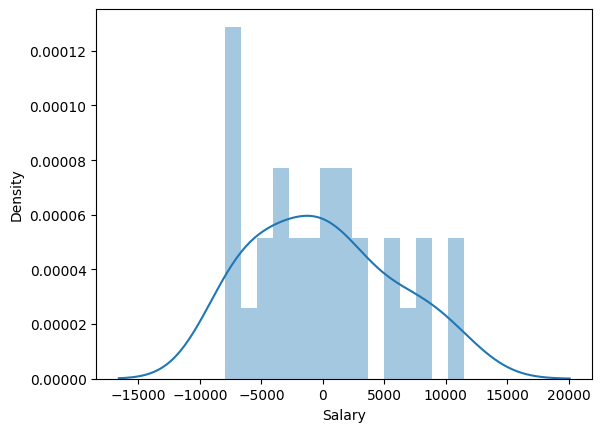

In [44]:
# The sum of weighted residuals

one = round( (df['Salary']-results),2 )   



fig = plt.figure()
one
sns.distplot(one, bins = 15) 

plt.show()


In [45]:
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)                       # Value of Target variable when we predict it with the Independent variable. 
r2_score(df['Salary'], results) 

0.9569566641435086

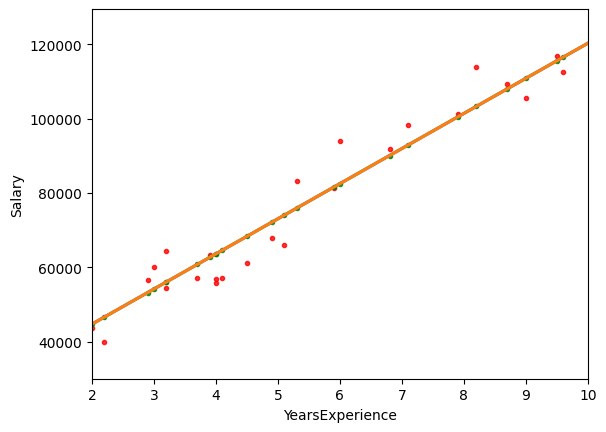

In [46]:


# Plotting the actual line
sns.regplot(x=df['YearsExperience'], y=df['Salary'], order=1, ci=None, scatter_kws={'color':'r', 's':9})

# Plotting the predicted line
sns.regplot(x=df['YearsExperience'], y=results, order=1, ci=None, scatter_kws={'color':'g', 's':9})

plt.xlim(2, 10)
plt.ylim(bottom=30000)

plt.show()



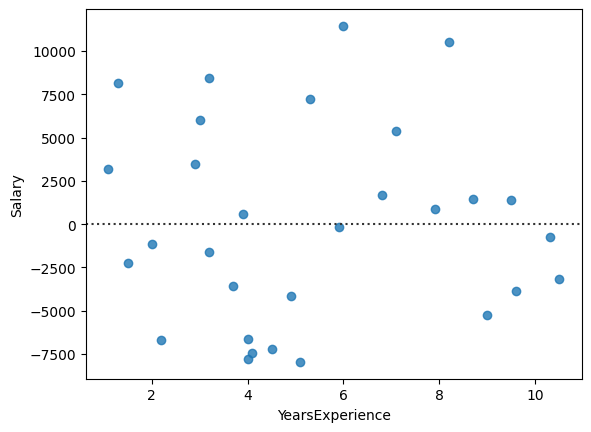

In [47]:
sns.residplot(x = "YearsExperience", y = "Salary", data = df)
plt.show() 

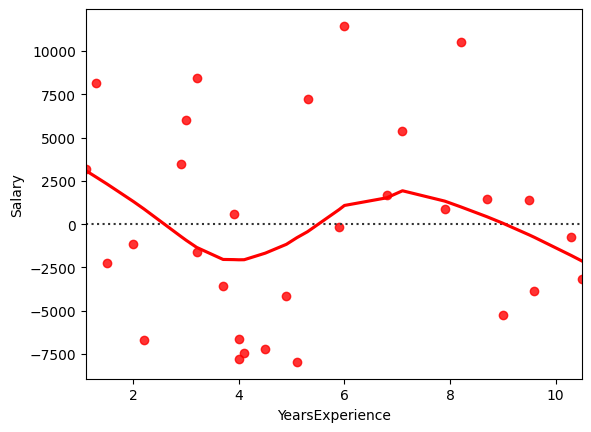

In [48]:
sns.residplot(x = "YearsExperience", y = "Salary", data = df, lowess = True,color = 'r') 
plt.show()

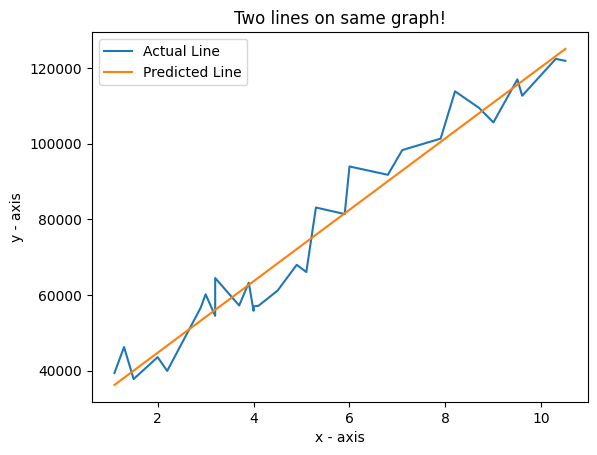

In [49]:
import matplotlib.pyplot as plt

plt.plot(df['YearsExperience'], df['Salary'], label = "Actual Line")

plt.plot(df['YearsExperience'], results, label = "Predicted Line")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two lines on same graph!')
plt.legend()
plt.show()

In [50]:
#  OLS = ordinary least square method. 

import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)                                   
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.14e-20
Time:                        09:55:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""